## Performing Analysis of Meteorological Data

In this blog we are to perform analysis on the given 'WeatherHistory' dataset for testing the hypothesis and finally put-forth the conclusion.
The Null Hypothesis is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global Warming".
We need to find whether the average Apparent Temperature for a month say April starting from year 2006 to 2016 and the average Humidity for the same period has increased or not. 
This monthly analysis has to be done for all 12 months over the 10 year period. 
So we're basically resampling our data from hourly to monthly, then comparing the same month over the 10 year period. 
Also we have to support our analysis by appropriate visualizations.

Required Python libraries for the analysis are NumPy, Pandas & Matplotlib

The dataset can be downloaded from Kaggle - (Source URL: https://www.kaggle.com/muthuj7/weather-dataset).

In [1]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

We will use our 'Formatted Date' column as the index.

In [3]:
dataset = pd.read_csv('WeatherHistory.csv', index_col='Formatted Date')

## Performing EDA

In [4]:
df = dataset.copy()
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.shape

(96453, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [7]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Data Cleaning

In [8]:
df.index.dtype

dtype('O')

In [9]:
df.index = pd.to_datetime(df.index, utc=True)

We will resample our dataset and include only the required columns for our analysis.

In [10]:
data_cols = ['Apparent Temperature (C)', 'Humidity']

df_monthly_avg = df[data_cols].resample('MS').mean()
df_monthly_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Here we've plotted the yearly variation in Apparent Temperature (C) and Humidity over the 10 year period starting from 2006 to 2016.

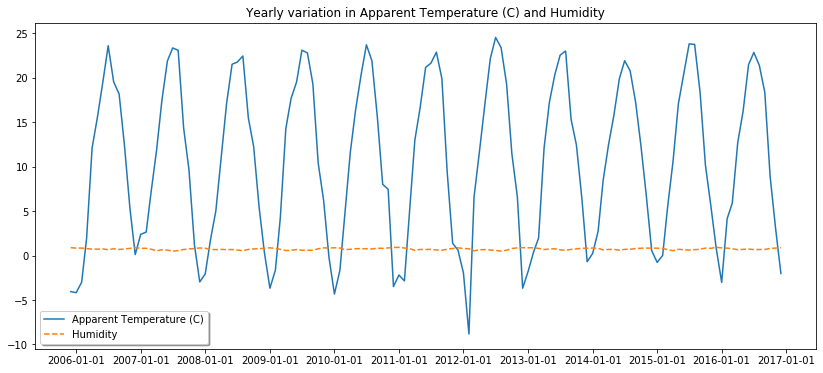

In [11]:
import matplotlib.dates as dts

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_monthly_avg['Apparent Temperature (C)'], '-', label='Apparent Temperature (C)')
ax.plot(df_monthly_avg['Humidity'], '--', label='Humidity')
ax.set_title('Yearly variation in Apparent Temperature (C) and Humidity')
ax.xaxis.set_major_locator(dts.YearLocator())
ax.legend(loc='best', frameon=True, shadow=True)
plt.show()

As we can see that both the peaks and the troughs in the graph are almost same throughout the 10 year period.

In [12]:
data = df_monthly_avg[df_monthly_avg.index.month==4]
data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875


Here is a plot that shows the yearly variation in Apparent Temperature (C) and Humidity for the month of April over the 10 year period starting from 2006 to 2016.

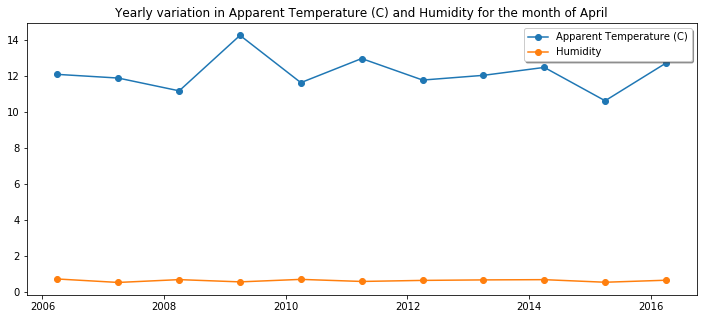

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data['Apparent Temperature (C)'], '-o', label='Apparent Temperature (C)')
ax.plot(data['Humidity'], '-o', label='Humidity')
ax.set_title('Yearly variation in Apparent Temperature (C) and Humidity for the month of April')
ax.legend(loc='best', frameon=True, shadow=True)
plt.show()

We can clearly see that global warming has caused an uncertain fluctuation of average Apparent Temperature over the past 10 years.
There is a sharp rise of temperature between year 2008-2009 which again decreases in year 2009-2010.
It is observed that the average Apparent Temperature is at its peak in year 2009 which further drops to its lowest in year 2015.
Whereas the average Humidity has remained nearly constant over the period of time.

## Conclusion:

So from our analysis we can conclude that there is no such increase in the average Apparent Temperature and average Humidity 
due to global warming as mentioned in the null hypothesis.